<a href="https://colab.research.google.com/github/juniperlovato/privacypolicypaper/blob/main/SBM_topic_Model_Privacy_Policy_Paper_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

example SBM topic model from authors here https://github.com/martingerlach/hSBM_Topicmodel/blob/master/TopSBM-tutorial.ipynb 

# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [ ]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

Executing: /tmp/apt-key-gpghome.7125nTgYEh/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://downloads.skewed.de/apt bionic InRelease [7,540 B]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:11 

In [ ]:
#python3-cairo from Ubuntu's reposity is linked with a different python version; we need to improvise
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'python3-cairo' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Now we can use graph-tool as any other Python module



In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local python=3.6 ujson
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

--2023-01-23 15:03:04--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   202MB/s    in 0.3s    

2023-01-23 15:03:04 (202 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6

In [ ]:
from graph_tool.all import *

ModuleNotFoundError: ignored

#SBM Topic Model 

##Imports 

In [ ]:
import io, os, sys, types
import os
import matplotlib as plt 
%matplotlib inline  
import csv


##SBM Topic Model Setup

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os,sys,argparse
import matplotlib.pyplot as plt
from collections import Counter,defaultdict
import pickle
import graph_tool.all as gt
from contextlib import redirect_stdout

class sbmtm():
    '''
    Class for topic-modeling with sbm's.
    '''

    def __init__(self):
        self.g = None ## network

        self.words = [] ## list of word nodes
        self.documents = [] ## list of document nodes

        self.state = None ## inference state from graphtool
        self.groups = {} ## results of group membership from inference
        self.mdl = np.nan ## minimum description length of inferred state
        self.L = np.nan ## number of levels in hierarchy

    def make_graph(self,list_texts, documents = None, counts=True, n_min = None):
        '''
        Load a corpus and generate the word-document network

        optional arguments:
        - documents: list of str, titles of documents
        - counts: save edge-multiplicity as counts (default: True)
        - n_min, int: filter all word-nodes with less than n_min counts (default None)
        '''
        D = len(list_texts)

        ## if there are no document titles, we assign integers 0,...,D-1
        ## otherwise we use supplied titles
        if documents == None:
            list_titles = [str(h) for h in range(D)]
        else:
            list_titles = documents

        ## make a graph
        ## create a graph
        g = gt.Graph(directed=False)
        ## define node properties
        ## name: docs - title, words - 'word'
        ## kind: docs - 0, words - 1
        name = g.vp["name"] = g.new_vp("string")
        kind = g.vp["kind"] = g.new_vp("int")
        if counts:
            ecount = g.ep["count"] = g.new_ep("int")

        docs_add = defaultdict(lambda: g.add_vertex())
        words_add = defaultdict(lambda: g.add_vertex())

        ## add all documents first
        for i_d in range(D):
            title = list_titles[i_d]
            d=docs_add[title]

        ## add all documents and words as nodes
        ## add all tokens as links
        for i_d in range(D):
            title = list_titles[i_d]
            text = list_texts[i_d]

            d=docs_add[title]
            name[d] = title
            kind[d] = 0
            c=Counter(text)
            for word,count in c.items():
                w=words_add[word]
                name[w] = word
                kind[w] = 1
                if counts:
                    e = g.add_edge(d, w)
                    ecount[e] = count
                else:
                    for n in range(count):
                        g.add_edge(d,w)

        ## filter word-types with less than n_min counts
        if n_min is not None:
            v_n = g.new_vertex_property("int")
            for v in g.vertices():
                v_n[v] = v.out_degree()

            v_filter =  g.new_vertex_property("bool")
            for v in g.vertices():
                if v_n[v] < n_min and g.vp['kind'][v]==1:
                    v_filter[v] = False
                else:
                    v_filter[v] = True
            g.set_vertex_filter(v_filter)
            g.purge_vertices()
            g.clear_filters()


        self.g = g
        self.words = [ g.vp['name'][v] for v in  g.vertices() if g.vp['kind'][v]==1   ]
        self.documents = [ g.vp['name'][v] for v in  g.vertices() if g.vp['kind'][v]==0   ]


    def make_graph_from_BoW_df(self, df, counts=True, n_min=None):
        """
        Load a graph from a Bag of Words DataFrame

        arguments
        -----------
        df should be a DataFrame with where df.index is a list of words and df.columns a list of documents

        optional arguments:
        - counts: save edge-multiplicity as counts (default: True)
        - n_min, int: filter all word-nodes with less than n_min counts (default None)

        :type df: DataFrame
        """
        # make a graph
        g = gt.Graph(directed=False)
        ## define node properties
        ## name: docs - title, words - 'word'
        ## kind: docs - 0, words - 1
        name = g.vp["name"] = g.new_vp("string")
        kind = g.vp["kind"] = g.new_vp("int")
        if counts:
            ecount = g.ep["count"] = g.new_ep("int")

        X = df.values

        # add all documents and words as nodes
        # add all tokens as links
        X = scipy.sparse.coo_matrix(X)

        if not counts and X.dtype != int:
            X_int = X.astype(int)
            if not np.allclose(X.data, X_int.data):
                raise ValueError('Data must be integer if '
                                 'weighted_edges=False')
            X = X_int

        docs_add = defaultdict(lambda: g.add_vertex())
        words_add = defaultdict(lambda: g.add_vertex())

        D = len(df.columns)
        ## add all documents first
        for i_d in range(D):
            title = df.columns[i_d]
            d = docs_add[title]
            name[d] = title
            kind[d] = 0

        ## add all words
        for i_d in range(len(df.index)):
            word = df.index[i_d]
            w = words_add[word]
            name[w] = word
            kind[w] = 1

        ## add all documents and words as nodes
        ## add all tokens as links
        for i_d in range(D):
            title = df.columns[i_d]
            text = df[title]
            for i_w, word, count in zip(range(len(df.index)), df.index, text):
                if count < 1:
                    continue
                if counts:
                    e = g.add_edge(i_d, D + i_w)
                    ecount[e] = count
                else:
                    for n in range(count):
                        g.add_edge(i_d, D + i_w)

        ## filter word-types with less than n_min counts
        if n_min is not None:
            v_n = g.new_vertex_property("int")
            for v in g.vertices():
                v_n[v] = v.out_degree()

            v_filter = g.new_vertex_property("bool")
            for v in g.vertices():
                if v_n[v] < n_min and g.vp['kind'][v] == 1:
                    v_filter[v] = False
                else:
                    v_filter[v] = True
            g.set_vertex_filter(v_filter)
            g.purge_vertices()
            g.clear_filters()

        self.g = g
        self.words = [g.vp['name'][v] for v in g.vertices() if g.vp['kind'][v] == 1]
        self.documents = [g.vp['name'][v] for v in g.vertices() if g.vp['kind'][v] == 0]
        return self

    def save_graph(self,filename = 'graph.gt.gz'):
        '''
        Save the word-document network generated by make_graph() as filename.
        Allows for loading the graph without calling make_graph().
        '''
        self.g.save(filename)

    def load_graph(self,filename = 'graph.gt.gz'):
        '''
        Load a word-document network generated by make_graph() and saved with save_graph().
        '''
        self.g = gt.load_graph(filename)
        self.words = [ self.g.vp['name'][v] for v in  self.g.vertices() if self.g.vp['kind'][v]==1   ]
        self.documents = [ self.g.vp['name'][v] for v in  self.g.vertices() if self.g.vp['kind'][v]==0   ]


    def fit(self,overlap = False, n_init = 1, verbose=False, epsilon=1e-3):
        '''
        Fit the sbm to the word-document network.
        - overlap, bool (default: False). Overlapping or Non-overlapping groups.
            Overlapping not implemented yet
        - n_init, int (default:1): number of different initial conditions to run in order to avoid local minimum of MDL.
        '''
        g = self.g
        if g is None:
            print('No data to fit the SBM. Load some data first (make_graph)')
        else:
            if overlap and "count" in g.ep:
                raise ValueError("When using overlapping SBMs, the graph must be constructed with 'counts=False'")
            clabel = g.vp['kind']

            state_args = {'clabel': clabel, 'pclabel': clabel}
            if "count" in g.ep:
                state_args["eweight"] = g.ep.count

            ## the inference
            mdl = np.inf ##
            for i_n_init in range(n_init):
                base_type = gt.BlockState if not overlap else gt.OverlapBlockState
                state_tmp = gt.minimize_nested_blockmodel_dl(g,
                                                             state_args=dict(
                                                                 base_type=base_type,
                                                                 **state_args),
                                                             multilevel_mcmc_args=dict(
                                                                 verbose=verbose))
                L = 0
                for s in state_tmp.levels:
                    L += 1
                    if s.get_nonempty_B() == 2:
                        break
                state_tmp = state_tmp.copy(bs=state_tmp.get_bs()[:L] + [np.zeros(1)])
                # state_tmp = state_tmp.copy(sampling=True)
                # delta = 1 + epsilon
                # while abs(delta) > epsilon:
                #     delta = state_tmp.multiflip_mcmc_sweep(niter=10, beta=np.inf)[0]
                #     print(delta)
                mdl_tmp = state_tmp.entropy()
                if mdl_tmp < mdl: 
                    mdl = 1.0*mdl_tmp
                    state = state_tmp.copy()

            self.state = state
            ## minimum description length
            print(mdl)
            print(state)
            self.mdl = state.entropy()
            L = len(state.levels)
            if L == 2:
                self.L = 1
            else:
                self.L = L-2

    def save_model(self, path):
        '''
        Save the trained model in the specified path as a pickle
        '''
        if '.pickle' not in path:
            path += '.pickle'
        with open(path, 'wb') as f:
            pickle.dump(self, f)
        
    def load_model(self, path):
        '''
        Load the trained model from the specified path to the pickle file
        '''
        if '.pickle' not in path:
            path += '.pickle'
        with open(path, 'rb') as f:
            obj = pickle.load(f)
            self.__dict__.update(obj.__dict__)
          

    def plot(self, filename=None, nedges=1000, hide_h=0, h_v_size=5.0, h_e_size=1.0, **kwargs):
        '''
        Plot the graph and group structure.
        optional:
        - filename, str; where to save the plot. if None, will not be saved
        - nedges, int; subsample  to plot (faster, less memory)
        - hide_h, int; wether or not to hide the hierarchy
        - h_v_size, float; size of hierarchical vertices
        - h_e_size, float; size of hierarchical edges
        - **kwargs; keyword arguments passed to self.state.draw method (https://graph-tool.skewed.de/static/doc/draw.html#graph_tool.draw.draw_hierarchy)
        '''
        self.state.draw(layout='bipartite', output=filename,
                        subsample_edges=nedges, hshortcuts=1, hide=hide_h,
                        hvprops={'size':h_v_size},
                        heprops={'pen_width':h_e_size},
                        **kwargs,
                       )


    def topics(self, l=0, n=10):
        '''
        get the n most common words for each word-group in level l.
        return tuples (word,P(w|tw))
        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)

        Bw = dict_groups['Bw']
        p_w_tw = dict_groups['p_w_tw']

        words = self.words

        ## loop over all word-groups
        dict_group_words = {}
        for tw in range(Bw):
            p_w_ = p_w_tw[:,tw]
            ind_w_ = np.argsort(p_w_)[::-1]
            list_words_tw = []
            for i in ind_w_[:n]:
                if p_w_[i] > 0:
                    list_words_tw+=[(words[i],p_w_[i])]
                else:
                    break
            dict_group_words[tw] = list_words_tw
        return dict_group_words

    def topicdist(self, doc_index, l=0):
        # dict_groups =  self.groups[l]
        dict_groups = self.get_groups(l=l)

        p_tw_d = dict_groups['p_tw_d']
        list_topics_tw = []
        for tw,p_tw in enumerate(p_tw_d[:,doc_index]):
                list_topics_tw += [(tw,p_tw)]
        return list_topics_tw

    def clusters(self,l=0,n=10):
        '''
        Get n 'most common' documents from each document cluster.
        most common refers to largest contribution in group membership vector.
        For the non-overlapping case, each document belongs to one and only one group with prob 1.

        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)
        Bd = dict_groups['Bd']
        p_td_d = dict_groups['p_td_d']

        docs = self.documents
        ## loop over all word-groups
        dict_group_docs = {}
        for td in range(Bd):
            p_d_ = p_td_d[td,:]
            ind_d_ = np.argsort(p_d_)[::-1]
            list_docs_td = []
            for i in ind_d_[:n]:
                if p_d_[i] > 0:
                    list_docs_td+=[(docs[i],p_d_[i])]
                else:
                    break
            dict_group_docs[td] = list_docs_td
        return dict_group_docs

    def clusters_query(self,doc_index,l=0):
        '''
        Get all documents in the same group as the query-document.
        Note: Works only for non-overlapping model.
        For overlapping case, we need something else.
        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)
        Bd = dict_groups['Bd']
        p_td_d = dict_groups['p_td_d']

        documents = self.documents
        ## loop over all word-groups
        dict_group_docs = {}
        td = np.argmax(p_td_d[:,doc_index])

        list_doc_index_sel = np.where(p_td_d[td,:]==1)[0]

        list_doc_query = []

        for doc_index_sel in list_doc_index_sel:
            if doc_index != doc_index_sel:
                list_doc_query += [(doc_index_sel,documents[doc_index_sel])]

        return list_doc_query


    def group_membership(self,l=0):
        '''
        Return the group-membership vectors for
            - document-nodes, p_td_d, array with shape Bd x D
            - word-nodes, p_tw_w, array with shape Bw x V
        It gives the probability of a nodes belonging to one of the groups.
        '''
        # dict_groups = self.groups[l]
        dict_groups = self.get_groups(l=l)
        p_tw_w = dict_groups['p_tw_w']
        p_td_d = dict_groups['p_td_d']
        return p_td_d,p_tw_w


    def print_topics(self,l=0,format='csv',path_save = ''):
        '''
        Print topics, topic-distributions, and document clusters for a given level in the hierarchy.
        format: csv (default) or html
        '''
        V=self.get_V()
        D=self.get_D()

        ## topics
        dict_topics = self.topics(l=l,n=-1)

        list_topics = sorted(list(dict_topics.keys()))
        list_columns = ['Topic %s'%(t+1) for t in list_topics]

        T = len(list_topics)
        df = pd.DataFrame(columns = list_columns,index=range(V))


        for t in list_topics:
            list_w = [h[0] for h in dict_topics[t]]
            V_t = len(list_w)
            df.iloc[:V_t,t] = list_w
        df=df.dropna(how='all',axis=0)
        if format == 'csv':
            fname_save = 'topsbm_level_%s_topics.csv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='')
        elif format == 'html':
            fname_save = 'topsbm_level_%s_topics.html'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_html(filename,index=False,na_rep='')
        elif format=='tsv':
            fname_save = 'topsbm_level_%s_topics.tsv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='',sep='\t')
        else:
            pass

        ## topic distributions
        list_columns = ['i_doc','doc']+['Topic %s'%(t+1) for t in list_topics]
        df = pd.DataFrame(columns=list_columns,index=range(D))
        for i_doc in range(D):
            list_topicdist = self.topicdist(i_doc,l=l)
            df.iloc[i_doc,0] = i_doc
            df.iloc[i_doc,1] = self.documents[i_doc]
            df.iloc[i_doc,2:] = [h[1] for h in list_topicdist]
        df=df.dropna(how='all',axis=1)
        if format == 'csv':
            fname_save = 'topsbm_level_%s_topic-dist.csv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='')
        elif format == 'html':
            fname_save = 'topsbm_level_%s_topic-dist.html'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_html(filename,index=False,na_rep='')
        else:
            pass

        ## doc-groups

        dict_clusters = self.clusters(l=l,n=-1)

        list_clusters = sorted(list(dict_clusters.keys()))
        list_columns = ['Cluster %s'%(t+1) for t in list_clusters]

        T = len(list_clusters)
        df = pd.DataFrame(columns = list_columns,index=range(D))


        for t in list_clusters:
            list_d = [h[0] for h in dict_clusters[t]]
            D_t = len(list_d)
            df.iloc[:D_t,t] = list_d
        df=df.dropna(how='all',axis=0)
        if format == 'csv':
            fname_save = 'topsbm_level_%s_clusters.csv'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_csv(filename,index=False,na_rep='')
        elif format == 'html':
            fname_save = 'topsbm_level_%s_clusters.html'%(l)
            filename = os.path.join(path_save,fname_save)
            df.to_html(filename,index=False,na_rep='')
        else:
            pass

    ###########
    ########### HELPER FUNCTIONS
    ###########
    ## get group-topic statistics
    def get_groups(self,l=0):
        '''
        extract statistics on group membership of nodes form the inferred state.
        return dictionary
        - B_d, int, number of doc-groups
        - B_w, int, number of word-groups
        - p_tw_w, array B_w x V; word-group-membership:
             prob that word-node w belongs to word-group tw: P(tw | w)
        - p_td_d, array B_d x D; doc-group membership:
             prob that doc-node d belongs to doc-group td: P(td | d)
        - p_w_tw, array V x B_w; topic distribution:
             prob of word w given topic tw P(w | tw)
        - p_tw_d, array B_w x d; doc-topic mixtures:
             prob of word-group tw in doc d P(tw | d)
        - label_map, array of size N; map from group labels to indexes in the above arrays
        '''
        V = self.get_V()
        D = self.get_D()
        N = self.get_N()

        g = self.g
        state = self.state
        state_l = state.project_level(l).copy(overlap=True)

        b = gt.contiguous_map(state_l.b)
        label_map = {}
        for v in g.vertices():
            label_map[state_l.b[v]] = b[v]
        state_l = state_l.copy(b=b)

        state_l_edges = state_l.get_edge_blocks() ## labeled half-edges

        counts = 'count' in self.g.ep.keys()

        ## count labeled half-edges, group-memberships
        B = state_l.get_nonempty_B()

        n_wb = np.zeros((V,B))  ## number of half-edges incident on word-node w and labeled as word-group tw
        n_db = np.zeros((D,B))  ## number of half-edges incident on document-node d and labeled as document-group td
        n_dbw = np.zeros((D,B)) ## number of half-edges incident on document-node d and labeled as word-group td

        if counts:
            eweight = g.ep["count"]
        else:
            eweight = g.new_ep("int", 1)

        ze = gt.ungroup_vector_property(state_l_edges, [0,1])
        for v1, v2, z1, z2, w in g.get_edges([ze[0], ze[1], eweight]):
            n_db[v1, z1] += w
            n_dbw[v1, z2] += w
            n_wb[v2 - D, z2] += w

        p_w = np.sum(n_wb,axis=1)/float(np.sum(n_wb))

        ind_d = np.where(np.sum(n_db,axis=0)>0)[0]
        Bd = len(ind_d)
        n_db = n_db[:,ind_d]

        ind_w = np.where(np.sum(n_wb,axis=0)>0)[0]
        Bw = len(ind_w)
        n_wb = n_wb[:,ind_w]

        ind_w2 = np.where(np.sum(n_dbw,axis=0)>0)[0]
        n_dbw = n_dbw[:,ind_w2]

        ## group-membership distributions
        # group membership of each word-node P(t_w | w)
        p_tw_w = (n_wb/np.sum(n_wb,axis=1)[:,np.newaxis]).T

        # group membership of each doc-node P(t_d | d)
        p_td_d = (n_db/np.sum(n_db,axis=1)[:,np.newaxis]).T

        ## topic-distribution for words P(w | t_w)
        p_w_tw = n_wb/np.sum(n_wb,axis=0)[np.newaxis,:]

        ## Mixture of word-groups into documetns P(t_w | d)
        p_tw_d = (n_dbw/np.sum(n_dbw,axis=1)[:,np.newaxis]).T


        result = {}
        result['Bd'] = Bd
        result['Bw'] = Bw
        result['p_tw_w'] = p_tw_w
        result['p_td_d'] = p_td_d
        result['p_w_tw'] = p_w_tw
        result['p_tw_d'] = p_tw_d
        result['label_map'] = label_map

        return result

    ### helper functions

    def get_V(self):
        '''
        return number of word-nodes == types
        '''
        return int(np.sum(self.g.vp['kind'].a==1)) # no. of types
    def get_D(self):
        '''
        return number of doc-nodes == number of documents
        '''
        return int(np.sum(self.g.vp['kind'].a==0)) # no. of types
    def get_N(self):
        '''
        return number of edges == tokens
        '''
        return int(self.g.num_edges()) # no. of types

    def group_to_group_mixture(self,l=0,norm=True):
        V = self.get_V()
        D = self.get_D()
        N = self.get_N()

        g = self.g
        state = self.state
        state_l = state.project_level(l).copy(overlap=True)
        state_l_edges = state_l.get_edge_blocks() ## labeled half-edges

        ## count labeled half-edges, group-memberships
        B = state_l.get_B()
        n_td_tw = np.zeros((B,B))

        counts = 'count' in self.g.ep.keys()

        for e in g.edges():
            z1,z2 = state_l_edges[e]
            if counts:
                n_td_tw[z1 , z2] += g.ep["count"][e]
            else:
                n_td_tw[z1, z2] += 1


        ind_d = np.where(np.sum(n_td_tw,axis=1)>0)[0]
        Bd = len(ind_d)
        ind_w = np.where(np.sum(n_td_tw,axis=0)>0)[0]
        Bw = len(ind_w)

        n_td_tw = n_td_tw[:Bd,Bd:]
        if norm == True:
            return n_td_tw/np.sum(n_td_tw)
        else:
            return n_td_tw

    def pmi_td_tw(self,l=0):
        '''
        Point-wise mutual information between topic-groups and doc-groups, S(td,tw)
        This is an array of shape Bd x Bw.

        It corresponds to
        S(td,tw) = log P(tw | td) / \tilde{P}(tw | td) .

        This is the log-ratio between
        P(tw | td) == prb of topic tw in doc-group td;
        \tilde{P}(tw | td) = P(tw) expected prob of topic tw in doc-group td under random null model.
        '''
        p_td_tw = self.group_to_group_mixture(l=l)
        p_tw_td = p_td_tw.T
        p_td = np.sum(p_tw_td,axis=0)
        p_tw = np.sum(p_tw_td,axis=1)
        pmi_td_tw = np.log(p_tw_td/(p_td*p_tw[:,np.newaxis])).T
        return pmi_td_tw


    def print_summary(self, file=None):
        '''
        Print hierarchy summary
        '''
        if file:
            with open(file, 'w') as f:
                with redirect_stdout(f):
                    self.state.print_summary()
        else:
            self.state.print_summary()

    def plot_topic_dist(self, l):
        #groups = self.groups[l]
        groups = self.get_groups(l)
        p_w_tw = groups['p_w_tw']
        fig=plt.figure(figsize=(12,10))
        plt.imshow(p_w_tw,origin='lower',aspect='auto',interpolation='none')
        plt.title(r'Word group membership $P(w | tw)$')
        plt.xlabel('Topic, tw')
        plt.ylabel('Word w (index)')
        plt.colorbar()
        fig.savefig("p_w_tw_%d.png"%l)
        p_tw_d = groups['p_tw_d']
        fig=plt.figure(figsize=(12,10))
        plt.imshow(p_tw_d,origin='lower',aspect='auto',interpolation='none')
        plt.title(r'Word group membership $P(tw | d)$')
        plt.xlabel('Document (index)')
        plt.ylabel('Topic, tw')
        plt.colorbar()
        fig.savefig("p_tw_d_%d.png"%l)

    def save_data(self):
        for i in range(len(self.state.get_levels())-2)[::-1]:
            print("Saving level %d"%i)
            self.print_topics(l=i)
            self.print_topics(l=i, format='tsv')
            self.plot_topic_dist(i)
            e = self.state.get_levels()[i].get_matrix()
            plt.matshow(e.todense())
            plt.savefig("mat_%d.png"%i)
        self.print_summary()

##Setting up dataset

In [ ]:

#--
import os
data_base_path = '/pathname'
cleaned_data_path = 'by-year'
data_path = os.path.join(data_base_path, cleaned_data_path)
#--
df = pd.read_csv(os.path.join(data_path, 'PrivacyPolicies-1999.csv.xz'))
#--
policy_texts = df['policy_text']

get bits 

In [ ]:
policy_texts.astype(str)

0      RealNetworks Membership in the TRUSTe Program\...
1      |   \n---  \n|   \n| Protecting our users’ pri...
2      |  |  privacy policy\n\n020 is committed to pr...
3      The TRUSTe seal verifies that Mail.com is a me...
4        \n\n\n  \nPrivacy is Personal...   \nand bas...
                             ...                        
597    Here at AllRecipes.com -- The Recipe Network, ...
598    As an Internet pioneer, AltaVista understands ...
599    ## Privacy Statement for Futuremark\n\nFuturem...
600    Personal information  \n|   \n|   \n|  At Ando...
601      |  3M respects your right to privacy. This p...
Name: policy_text, Length: 602, dtype: object

In [ ]:
#--
texts = [h.split() for h in policy_texts]

## SBMTM topic model - model fit 

Setup: Load a corpus
1) We have a list of documents, each document contains a list of words.

2) We have a list of document titles (optional)

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).

Fitting the model and then printing out the MDL 

In [ ]:
i_doc = 0

In [ ]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(texts)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'ALL_graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results

#final number is the MDL mminimum description length 
#the smaller the better for MDL 
model.fit()

#prints out MDL minimum description length 
#then prints out self state 

687216.4221680054
<NestedBlockState object, with base <BlockState object with 17635 blocks (374 nonempty), degree-corrected, for graph <Graph object, undirected, with 17635 vertices and 179264 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f64d067dd30>, at 0x7f64d060e220>, and 6 levels of sizes [(17635, 374), (374, 39), (39, 9), (9, 3), (3, 2), (2, 1)] at 0x7f64fc3af5e0>


Plotting the result
The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

document-nodes are on the left
word-nodes are on the right
different colors correspond to the different groups
The result is a grouping of nodes into groups on multiple levels in the hierarchy:

on the uppermost level, each node belongs to the same group (square in the middle)
on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)


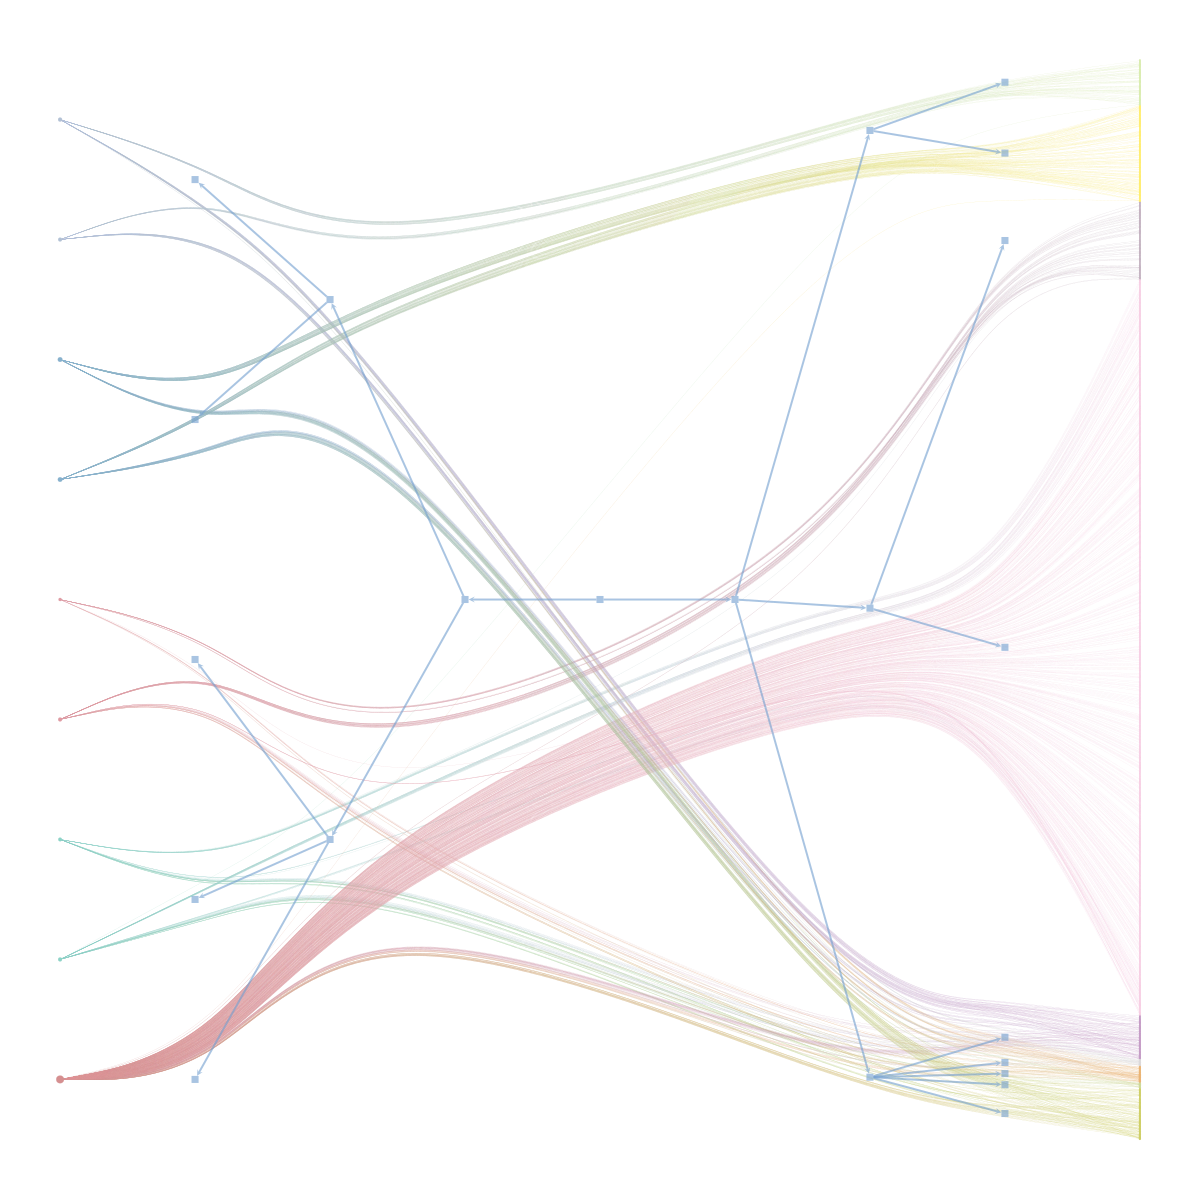

In [ ]:
model.plot(nedges=1000)


- Topics 

For each word-group on a given level in the hierarchy, we retrieve the  n
  most common words in each group -- these are the topics!

In [ ]:
# How many topics are there?
l=0
numTopics=2
while numTopics > 1:
  numTopics = len(model.topics(l))
  print("At level l="+str(l)+" there are "+str(numTopics)+" topics.")
  l=l+1

At level l=0 there are 9 topics.
At level l=1 there are 3 topics.
At level l=2 there are 1 topics.


The basics
Topics
For each word-group on a given level in the hierarchy, we retrieve the  most common words in each group -- these are the topics!

For chosen level "l", show the topics ("n" most frequent words)


In [ ]:
import json

In [ ]:
topics = model.topics(l=0,n=100)

# with open('/pathname', 'w') as file:
#      file.write(json.dumps(topics))

     

In [ ]:
topics

{0: [('address', 0.6602209944751382), ('name', 0.3397790055248619)],
 1: [('cookies', 1.0)],
 2: [('preferences', 0.5142857142857142),
  ('family', 0.22857142857142856),
  ('employment', 0.17142857142857143),
  ('condition', 0.08571428571428572)],
 3: [('age', 0.8157894736842105),
  ('behavior', 0.15789473684210525),
  ('professional', 0.02631578947368421)],
 4: [('interests', 0.25),
  ('password', 0.19736842105263158),
  ('identified', 0.10526315789473684),
  ('analyze', 0.06578947368421052),
  ('passwords', 0.06578947368421052),
  ('combination', 0.06578947368421052),
  ('education', 0.039473684210526314),
  ('physical', 0.039473684210526314),
  ('color', 0.039473684210526314),
  ('location', 0.039473684210526314),
  ('hand', 0.02631578947368421),
  ('exercise', 0.02631578947368421),
  ('language', 0.013157894736842105),
  ('locate', 0.013157894736842105),
  ('characteristics', 0.013157894736842105)],
 5: [('child', 1.0)]}

Topic-distribution in each document
Which topics contribute to each document?



In [ ]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=1)

0


[(0, 1.0), (1, 0.0)]

- Clustering of documents

The stochastic block models clusters the documents into groups. We do not need to run an additional clustering to obtain this grouping.

In [ ]:
# How many groups of documents?
l=0
numDoc=2
while(numDoc>1):
  numDoc=len(model.clusters(l))
  print("At level l="+str(l)+" there are "+str(numDoc)+" clusters of documents")
  l=l+1

At level l=0 there are 6 clusters of documents
At level l=1 there are 2 clusters of documents
At level l=2 there are 1 clusters of documents


In [ ]:
model.clusters(l=1,n=5)

{0: [('0', 1.0), ('20', 1.0), ('94', 1.0), ('93', 1.0), ('22', 1.0)],
 1: [('127', 1.0), ('79', 1.0), ('50', 1.0), ('51', 1.0), ('53', 1.0)]}

- Application -- Finding similar articles.

For a query-article, we return all articles from the same group

In [ ]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1)

2 2


[(0, '0'),
 (3, '3'),
 (4, '4'),
 (5, '5'),
 (9, '9'),
 (11, '11'),
 (12, '12'),
 (13, '13'),
 (18, '18'),
 (20, '20'),
 (21, '21'),
 (22, '22'),
 (24, '24'),
 (25, '25'),
 (26, '26'),
 (27, '27'),
 (29, '29'),
 (30, '30'),
 (31, '31'),
 (32, '32'),
 (34, '34'),
 (40, '40'),
 (41, '41'),
 (42, '42'),
 (49, '49'),
 (52, '52'),
 (55, '55'),
 (56, '56'),
 (59, '59'),
 (69, '69'),
 (71, '71'),
 (76, '76'),
 (83, '83'),
 (84, '84'),
 (86, '86'),
 (87, '87'),
 (88, '88'),
 (89, '89'),
 (93, '93'),
 (94, '94'),
 (97, '97'),
 (98, '98'),
 (101, '101'),
 (104, '104'),
 (108, '108'),
 (111, '111'),
 (113, '113'),
 (114, '114'),
 (116, '116'),
 (120, '120')]

More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability . Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

P(bd | d), the probability of document  to belong to document group 
P(bw | w), the probability of word  to belong to word group .

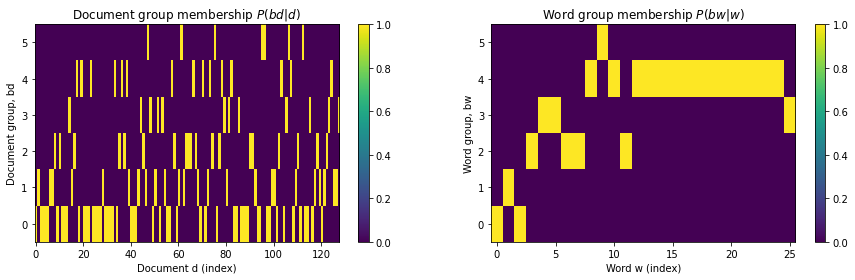

In [ ]:
p_td_d,p_tw_w = model.group_membership(l=0)

f = plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()